# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [125]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json, pprint
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key, geoapify_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [132]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 622
['ushuaia', 'rikitea', 'hermanus', 'taolanaro', 'yabrud', 'tasiilaq', 'yellowknife', 'umzimvubu', 'hithadhoo', 'nelson bay', 'tuatapere', 'jamestown', 'geraldton', 'jaguaruna', 'trapani', 'el faiyum', 'tuktoyaktuk', 'iquique', 'saskylakh', 'port alfred', 'laguna', 'kununurra', 'kloulklubed', 'carnarvon', 'ostrovnoy', 'tual', 'shepetivka', 'isangel', 'qui nhon', 'chumikan', 'ntcheu', 'merauke', 'mahibadhoo', 'punta arenas', 'hobart', 'bluff', 'kapaa', 'bandiagara', 'albany', 'saint-philippe', 'montepuez', 'mangaratiba', 'lavrentiya', 'nikolskoye', 'khatanga', 'orlik', 'state college', 'broome', 'cidreira', 'vaitupu', 'barentsburg', 'olhao', 'varna', 'puerto leguizamo', 'chuy', 'cape town', 'bolungarvik', 'pahrump', 'sao filipe', 'avarua', 'attawapiskat', 'coquimbo', 'omachi', 'saldanha', 'maltahohe', 'puerto ayora', 'nuevo progreso', 'provideniya', 'wattegama', 'nabire', 'leningradskiy', 'wyndham', 'grand river south east', 'tarrega', 'kahului', 'mar de

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [147]:
# The option to use the name of the city has been deperacated and allows only th lat and lon. using geocoding from the
# openweathermap provides an accurate response of the lat and lon of the provided city.
# Set the API for getting City Lat and Long 
url_geocoding = "http://api.openweathermap.org/geo/1.0/direct?"

#Create empty dict
city_dict = {}

for city in cities[:15]:
    #print(city)
    #city_dict [city] = [[1,2]]

    param = {
        "q": city,
        "limit": 1,
        "appid": weather_api_key
    }
    print(city)
    try:
        response = requests.get(url_geocoding, params=param).json()
        #print(json.dumps(response, indent=4, sort_keys= True))
        city_dict[city] = [response[0]["lat"],response[0]["lon"]]
    except:
        print("City not found. Skippting...")
        pass

#pprint.pprint(city_dict)


ushuaia
[
    {
        "country": "AR",
        "lat": -54.806115899999995,
        "lon": -68.3184972880496,
        "name": "Ushuaia",
        "state": "Tierra del Fuego Province"
    }
]
rikitea
[
    {
        "country": "FR",
        "lat": -23.1229544,
        "local_names": {
            "fr": "Rikitea",
            "ru": "\u0420\u0438\u043a\u0438\u0442\u0435\u0430"
        },
        "lon": -134.9680141,
        "name": "Rikitea",
        "state": "French Polynesia"
    }
]
hermanus
[
    {
        "country": "ZA",
        "lat": -34.4175,
        "local_names": {
            "af": "Hermanus",
            "ar": "\u0647\u064a\u0631\u0645\u0627\u0646\u0648\u0633",
            "de": "Hermanus",
            "es": "Hermanus",
            "et": "Hermanus",
            "fr": "Hermanus",
            "it": "Hermanus",
            "mg": "Hermanus",
            "nl": "Hermanus",
            "pl": "Hermanus",
            "ro": "Hermanus",
            "ru": "\u0425\u0435\u0440\u043c\u0430\

In [148]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

#create blank dict
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities
for i, city in enumerate(city_dict):

    if i == 10:
        break
    
    # Group cities in sets of 50 for logging purposes
    if (i % 5 == 0 and i >= 5):
        set_count += 1
        record_count = 1
    
    #Create endpoint URL with each city
    param ={
        "lat": city_dict[city][0],
        "lon": city_dict[city][1],
        "appid": weather_api_key
    }

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url,params=param).json()
    
        #city_name = list(city_dict.keys())[i]
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        city_data.append({"City": city, 
                "Lat": city_lat, 
                "Lng": city_lng, 
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date})
    except:
        print("City not found. Skippting...")
        pass

#pprint.pprint(city_data)
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

#print(json.dumps(response, indent = 4, sort_keys=True))
#print(city_data)


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | yabrud
Processing Record 5 of Set 1 | tasiilaq
Processing Record 1 of Set 2 | yellowknife
Processing Record 2 of Set 2 | umzimvubu
Processing Record 3 of Set 2 | hithadhoo
Processing Record 4 of Set 2 | nelson bay
Processing Record 5 of Set 2 | tuatapere
-----------------------------
Data Retrieval Complete      
-----------------------------


In [149]:
pprint.pprint(city_data)

[{'City': 'ushuaia',
  'Cloudiness': 75,
  'Country': 'AR',
  'Date': 1675013072,
  'Humidity': 82,
  'Lat': -54.8061,
  'Lng': -68.3185,
  'Max Temp': 283.98,
  'Wind Speed': 7.2},
 {'City': 'rikitea',
  'Cloudiness': 77,
  'Country': 'PF',
  'Date': 1675013073,
  'Humidity': 74,
  'Lat': -23.123,
  'Lng': -134.968,
  'Max Temp': 299,
  'Wind Speed': 4.86},
 {'City': 'hermanus',
  'Cloudiness': 100,
  'Country': 'ZA',
  'Date': 1675013073,
  'Humidity': 59,
  'Lat': -34.4175,
  'Lng': 19.2361,
  'Max Temp': 293.62,
  'Wind Speed': 10.86},
 {'City': 'yabrud',
  'Cloudiness': 72,
  'Country': 'SY',
  'Date': 1675013074,
  'Humidity': 69,
  'Lat': 33.9665,
  'Lng': 36.661,
  'Max Temp': 279.2,
  'Wind Speed': 0.42},
 {'City': 'tasiilaq',
  'Cloudiness': 32,
  'Country': 'GL',
  'Date': 1675013074,
  'Humidity': 79,
  'Lat': 65.6153,
  'Lng': -37.6378,
  'Max Temp': 263.43,
  'Wind Speed': 2.32},
 {'City': 'yellowknife',
  'Cloudiness': 20,
  'Country': 'CA',
  'Date': 1675013075,
  'Humi

In [150]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          10
Lat           10
Lng           10
Max Temp      10
Humidity      10
Cloudiness    10
Wind Speed    10
Country       10
Date          10
dtype: int64

In [151]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8061,-68.3185,283.98,82,75,7.20,AR,1675013072
1,rikitea,-23.1230,-134.9680,299.00,74,77,4.86,PF,1675013073
2,hermanus,-34.4175,19.2361,293.62,59,100,10.86,ZA,1675013073
3,yabrud,33.9665,36.6610,279.20,69,72,0.42,SY,1675013074
4,tasiilaq,65.6153,-37.6378,263.43,79,32,2.32,GL,1675013074


In [152]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities_beta.csv", index_label="City_ID")

In [153]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities_beta.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8061,-68.3185,283.98,82,75,7.20,AR,1675013072
1,rikitea,-23.1230,-134.9680,299.00,74,77,4.86,PF,1675013073
2,hermanus,-34.4175,19.2361,293.62,59,100,10.86,ZA,1675013073
3,yabrud,33.9665,36.6610,279.20,69,72,0.42,SY,1675013074
4,tasiilaq,65.6153,-37.6378,263.43,79,32,2.32,GL,1675013074


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

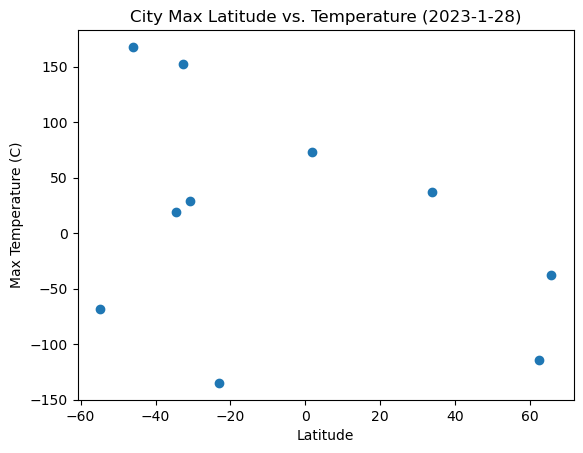

In [155]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Lng"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-1-28)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
# Save the figure
plt.savefig("../output_data/Fig1_beta.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

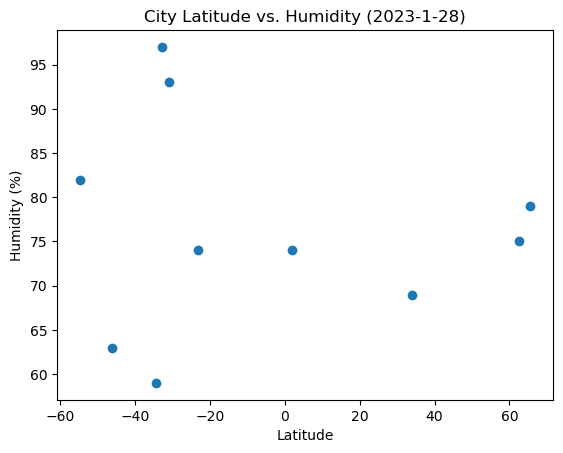

In [156]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-1-28)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Fig2_beta.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

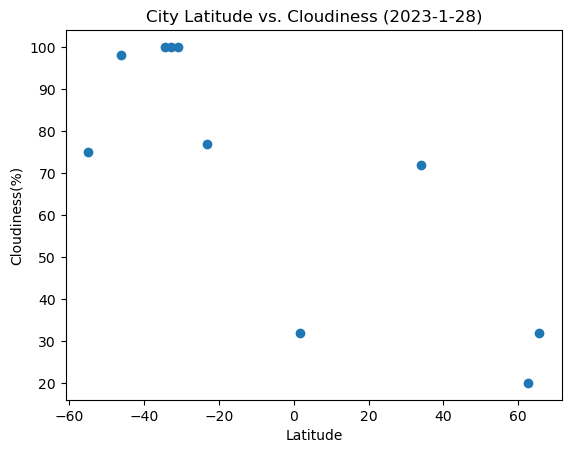

In [157]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-1-28)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

# Save the figure
plt.savefig("../output_data/Fig3_beta.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

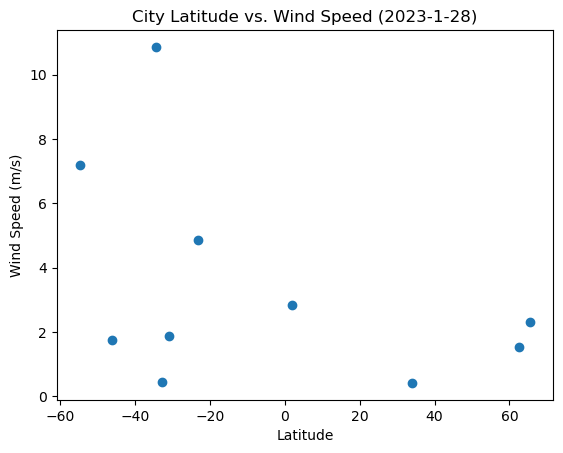

In [158]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-1-28)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("../output_data/Fig4_beta.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [159]:
# Define a function to create Linear Regression plots
def lin_regress(l_x_values,l_y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(l_x_values,l_y_values)

    #Get regression values
    regress_values = l_x_values * slope + intercept

    line_eq = prt_lin_regress(slope,intercept)
    return(regress_values, rvalue, line_eq)

def prt_lin_regress(slope, intercept):

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return(line_eq)


In [160]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,yabrud,33.9665,36.6610,279.20,69,72,0.42,SY,1675013074
4,tasiilaq,65.6153,-37.6378,263.43,79,32,2.32,GL,1675013074
5,yellowknife,62.4541,-114.3774,241.60,75,20,1.54,CA,1675013075
7,hithadhoo,1.7959,73.3876,300.34,74,32,2.83,MV,1675013076


In [161]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8061,-68.3185,283.98,82,75,7.20,AR,1675013072
1,rikitea,-23.1230,-134.9680,299.00,74,77,4.86,PF,1675013073
2,hermanus,-34.4175,19.2361,293.62,59,100,10.86,ZA,1675013073
6,umzimvubu,-30.8249,28.9218,283.76,93,100,1.89,ZA,1675013075
8,nelson bay,-32.7218,152.1441,295.87,97,100,0.45,AU,1675013076


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8357541475497431


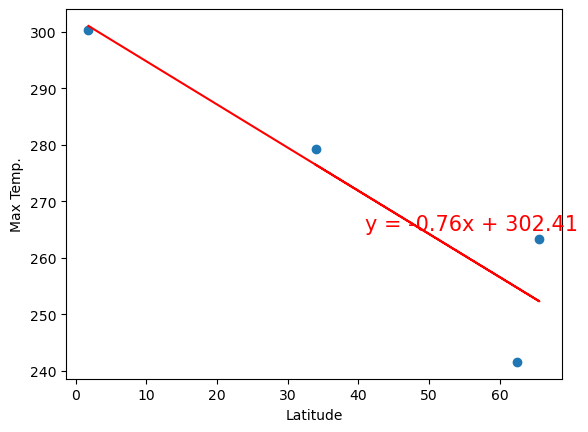

In [162]:
# Linear regression on Northern Hemisphere
l_x_values = northern_hemi_df["Lat"]
l_y_values = northern_hemi_df["Max Temp"]
(regress_values, rvalue, line_eq) = lin_regress(l_x_values, l_y_values)


plt.scatter(l_x_values,l_y_values)
plt.plot(l_x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Max Temp.")
plt.annotate(line_eq,(41,265),fontsize=15,color="red")

#Print r values
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.4843635895722908


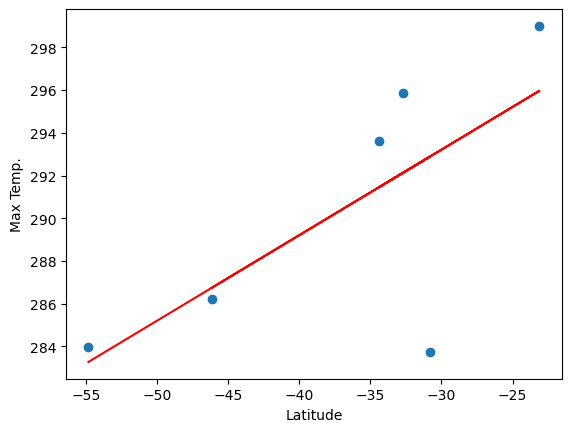

In [163]:
# Linear regression on Southern Hemisphere
l_x_values = southern_hemi_df["Lat"]
l_y_values = southern_hemi_df["Max Temp"]
(regress_values, rvalue, line_eq) = lin_regress(l_x_values, l_y_values)


plt.scatter(l_x_values,l_y_values)
plt.plot(l_x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Max Temp.")
plt.annotate(line_eq,xy=(-20,294),color="red")

#Print r values
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2399826160853378


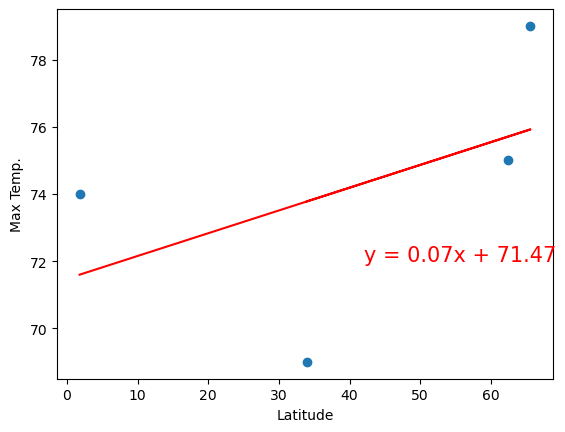

In [164]:
# Northern Hemisphere
l_x_values = northern_hemi_df["Lat"]
l_y_values = northern_hemi_df["Humidity"]
(regress_values, rvalue, line_eq) = lin_regress(l_x_values, l_y_values)


plt.scatter(l_x_values,l_y_values)
plt.plot(l_x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Max Temp.")
plt.annotate(line_eq,(42,72),fontsize=15,color="red")

#Print r values
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.02310327441411349


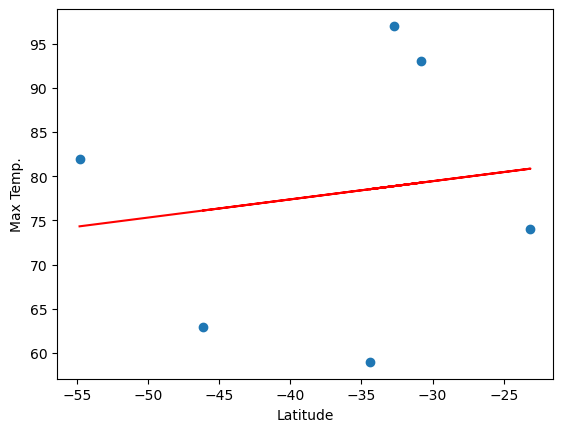

In [165]:
# Southern Hemisphere
l_x_values = southern_hemi_df["Lat"]
l_y_values = southern_hemi_df["Humidity"]
(regress_values, rvalue, line_eq) = lin_regress(l_x_values, l_y_values)


plt.scatter(l_x_values,l_y_values)
plt.plot(l_x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Max Temp.")
plt.annotate(line_eq,(-40,35),fontsize=15,color="red")

#Print r values
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0703869681639588


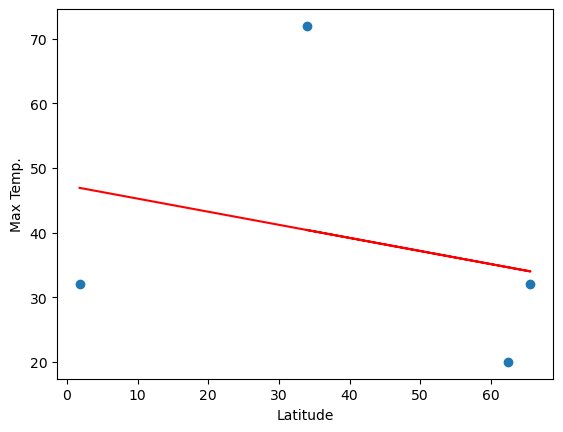

In [166]:
# Northern Hemisphere
l_x_values = northern_hemi_df["Lat"]
l_y_values = northern_hemi_df["Cloudiness"]
(regress_values, rvalue, line_eq) = lin_regress(l_x_values, l_y_values)


plt.scatter(l_x_values,l_y_values)
plt.plot(l_x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Max Temp.")
plt.annotate(line_eq,(41,80),fontsize=15,color="red")

#Print r values
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.042649931109256


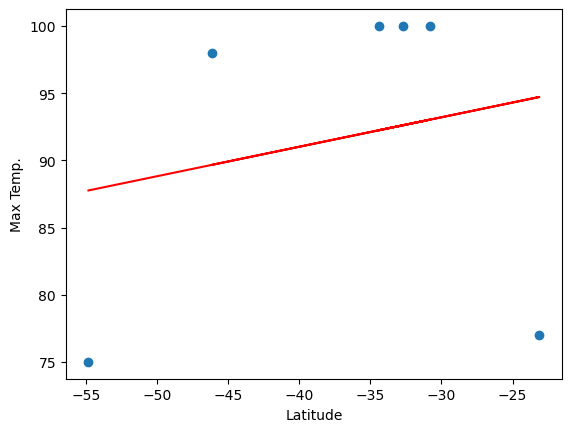

In [167]:
# Southern Hemisphere
l_x_values = southern_hemi_df["Lat"]
l_y_values = southern_hemi_df["Cloudiness"]
(regress_values, rvalue, line_eq) = lin_regress(l_x_values, l_y_values)


plt.scatter(l_x_values,l_y_values)
plt.plot(l_x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Max Temp.")
plt.annotate(line_eq,(-40,60),fontsize=15,color="red")

#Print r values
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06282719452583524


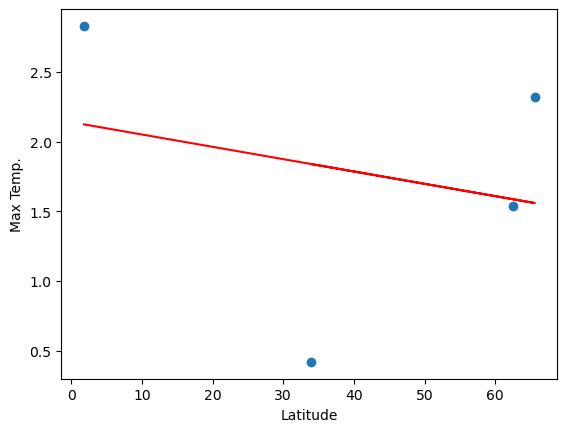

In [168]:
# Northern Hemisphere
l_x_values = northern_hemi_df["Lat"]
l_y_values = northern_hemi_df["Wind Speed"]
(regress_values, rvalue, line_eq) = lin_regress(l_x_values, l_y_values)


plt.scatter(l_x_values,l_y_values)
plt.plot(l_x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Max Temp.")
plt.annotate(line_eq,(-40,60),fontsize=15,color="red")

#Print r values
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.023860746842874432


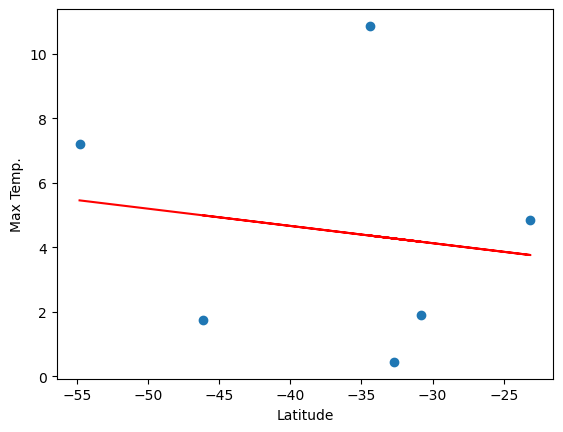

In [169]:
# Southern Hemisphere
l_x_values = southern_hemi_df["Lat"]
l_y_values = southern_hemi_df["Wind Speed"]
(regress_values, rvalue, line_eq) = lin_regress(l_x_values, l_y_values)


plt.scatter(l_x_values,l_y_values)
plt.plot(l_x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Max Temp.")
plt.annotate(line_eq,(-40,60),fontsize=15,color="red")

#Print r values
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE